# Sesión 3

## Wladimir Banda-Barragán

Please complete the following problems. You can work with your **TEAM** members.

When you finish, you can call your notebook with the TEAM's name, e.g. TEAM_name.ipynb, and also include your names in the notebook. Then, you can create a pull request to the subfolder **homework** in Session 3.

Note that data for the exercises are not given on purpose. Use online material to **INVESTIGATE** what data you need to solve the problems.

Within a **SINGLE python notebook**, add the following:

### Author: Fernando Moncada

### Problem 1.
Calculate:


 - The pressure of the plasma permeating the Solar corona. How does it compare to Earth's atmospheric pressure at the sea level? The number density of the Solar corona is $n=10^9\,\rm cm^{-3}$ and its temperature is $T=2\times 10^6\,\rm K$.
 
 
 - The polytropic index of carbon-monoxide (CO) gas. Hint: Get the degrees of freedom first.


 - The mean particle mass (mean molecular weight) of air in our atmosphere (remember Nytrogen is the most abundant element). Once calculated, add it to the phase diagram $T$ vs. $\mu$ shown in class. How does the value compare to that of atomic hydrogen?


 - The Reynolds number of the blood flow in the aorta. Hint: Use the Internet to get the parameters you need.


### Problem 2.
Considering the example of the swimming fish we saw in class, calculate the Reynolds numbers for different swimming speeds and make a plot of $R_{\rm e}$ vs. speed. Indicate the laminar and turbulent regimes on the plot. At which speed does the fish start generating a turbulent flow in sea water?


### Problem 3.
Download the full dataset from the 2D turbulence simulation that we analysed in class (TURB_DRIVE) and:

 - Calculate the rms flow velocity and the corresponding rms Mach number as a function of time (see equations in the lecture notebook).
 
 
 - Save the data into a text file as shown in the example in class, and then make a plot of rms Mach number versus time. Remember that the sound speed of the simulation is $c_{\rm iso}=10\,\rm km\,s^{-1}$.
 
 
 - Based on the result above, is the gas subsonic or supersonic in this simulation?
 
 
 - Calculate the gas pressure using the isothermal equation of state ($p=\rho\,c_{\rm iso}^2$), and make and print a 2D map of the pressure for file #70.
 
 
 - Now that you have the pressure, you can calculate the so-called plasma beta of the gas, which is a dimensionless parameter that relates thermal, $p$, and magnetic pressure $\left(\frac{B^2}{8\,\pi}\right)$. Compute the plasma beta and make and print a 2D map for file #70.
 
 $$\beta = \frac{8\,\pi\,p}{B^2}$$
 

Full Data: https://www.dropbox.com/sh/gt3grmb24no04lp/AAAxAZGErA1E1cpZ0xENF1Xma?dl=0

## Problema 1

### Literal a

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def pressure(x, y):
    return (x*1.38e-16*y)

print('Solar corone:', "{:0.5e}".format(pressure(10**(9),2*10**6.0)))
print('Dry air in the atmosphere of our planet:', "{:0.5e}".format(pressure(2.504*10**19,10**2.47)))
print('Athmospheric pressure is:', "{:0.5e}".format(pressure(2.504*10**19,10**2.47)/pressure(10**(9),2*10**6.0)),"higher than pressure at solar corone")

Solar corone: 2.76000e-01
Dry air in the atmosphere of our planet: 1.01980e+06
Athmospheric pressure is: 3.69491e+06 higher than pressure at solar corone


### Literal b

Corbon monoxide is a diatomic molecule so it has 5 degrees of freedom (3 translational and 2 rotational)

In [3]:
df=5
gamma=1+2/df
print("Polytropic index of CO is ",gamma)

Polytropic index of CO is  1.4


### Literal c

Air composition is given by

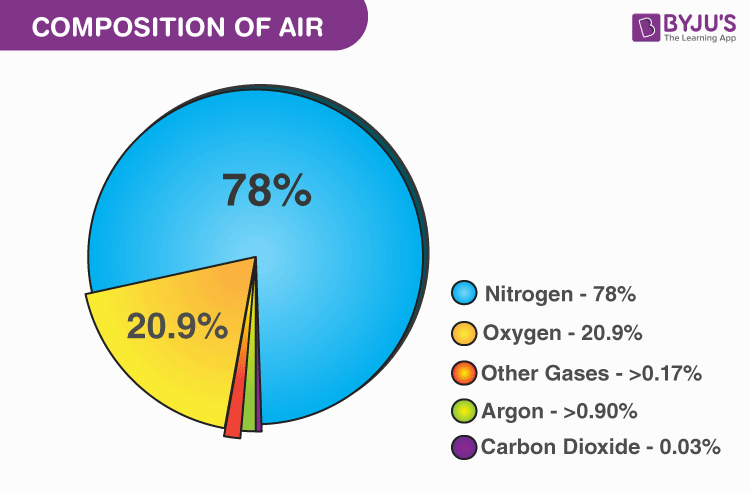

In [4]:
#Nitrogen,Oxigen,Argon,CO
x=np.array([0.78, 0.209, 0.009, 0.0003])
x=x/sum(x)
A=np.array([14, 16, 40, 12+16])
Z=np.array([7, 8, 18, 6+8])
mu_h=1/sum(x*(1+Z)/A)
mu_h

1.7584604883633879

In [5]:
print("the mean particle mass of air is",mu_h/0.5,"times higher than that of hydrogen")

the mean particle mass of air is 3.5169209767267757 times higher than that of hydrogen


C:\Users\ferna\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


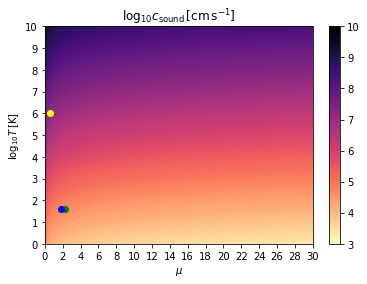

In [6]:
# Plot phase plot, including the third point calculated above.
#For the point of air
T_h=1.60

#Points shown in class
mu1 = 0.61
T1 = 6

mu2 = 2.3
T2 = 1.60205999133

# Define the EOS equation
def sound_speed(mu, temp):
    gamma = 5./3.
    k_B = 1.38e-16
    amu = 1.660e-24 
    return np.sqrt((gamma*k_B*temp)/(mu*amu))

# Create a 2D grid with n and T as X and Y.
mu = np.arange(0,30,0.01)
temperature = np.arange(0,10,0.01)

X, Y = np.meshgrid(mu, temperature)

# Compute pressure on the grid
pressure_2D = np.array(sound_speed(np.ravel(X), np.ravel(10**Y)))
Z = pressure_2D.reshape(X.shape)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(3, 10, 91), cmap='magma_r')
ax.scatter(mu1, T1, c='yellow')
ax.scatter(mu2, T2, c='green')
ax.scatter(mu_h, T_h, c='blue')#Homework plot is shown in blue
    
# Add a colorbar and customise axes
fig.colorbar(cp, ticks = np.arange(3,11,1))
ax.set_title(r'$\log_{10} c_{\rm sound}\,\rm [cm\,s^{-1}$]')
ax.set_xticks(np.arange(0,31.0,2.0))
ax.set_xlabel(r'$\mu$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$\log_{10}T\,\rm [K]$')
plt.show()

### Literal d

In [7]:
def Re_number(rho, vel, length, mu):
    return (rho*vel*length)/(mu)

# All quantities in SI units.

mu=3.5*(10**(-3))#https://en.wikipedia.org/wiki/Hemorheology
le=0.2141#https://link.springer.com/article/10.1007/s10047-006-0346-z
rho=1060#Wikipedia
vel=0.11#https://www.ahajournals.org/doi/10.1161/01.CIR.40.5.603


print('The Reynolds number for blood is', "{:0.5e}".format(Re_number(rho,vel,le,mu)))

The Reynolds number for blood is 7.13259e+03


## Problem 2

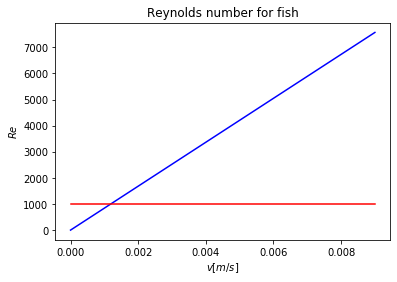

In [8]:
# All quantities in SI units.

mu=0.00122
le=1
rho=1026
vel=np.arange(0,0.01,0.001)

fig,ax=plt.subplots(1,1) 

ax.plot(vel, Re_number(rho,vel,le,mu), c='blue')
ax.plot(vel, 1000*np.ones(len(vel)), c='red')

ax.set_title('Reynolds number for fish')
ax.set_xlabel(r'$v[m/s]$')
ax.set_ylabel(r'$Re$')
plt.show()

In [9]:
print("A nonturbulen behavior is found for ",1000*mu/(rho*le),"[m/s]")

A nonturbulen behavior is found for  0.001189083820662768 [m/s]


### Problem 3

In [10]:
import vtk
import math


In [16]:
input_directory="./simulation_data/TURB_DRIVE/"
file_name = "data.0010.vtk"
reader = vtk.vtkDataSetReader()
reader.SetFileName(input_directory+file_name)
reader.ReadAllScalarsOn()
reader.ReadAllVectorsOn()
reader.Update()
data = reader.GetOutput()
dens = data.GetCellData().GetArray("rho")
velx = data.GetCellData().GetArray("vx1")
vely = data.GetCellData().GetArray("vx2")
bfix = data.GetCellData().GetArray("Bx1")
bfiy = data.GetCellData().GetArray("Bx2")
dim = data.GetDimensions()
vec = list(dim)
vec = [i-1 for i in dim]
rho = np.reshape(dens,(vec[0],vec[1]))
vx = np.reshape(velx,(vec[0],vec[1]))
vy = np.reshape(vely,(vec[0],vec[1]))
Bx = np.reshape(bfix,(vec[0],vec[1]))
By = np.reshape(bfiy,(vec[0],vec[1]))
rho_norm = 1.66e-24 #g/cm^3
L_norm = 3.086e+18 #cm = 1pc (parsec)
v_norm = 1.e+6 #cm/s
B_norm = np.sqrt(4*math.pi*rho_norm*v_norm**2)
rho_cgs = rho*rho_norm
vx_cgs = vx*v_norm
vy_cgs = vy*v_norm
Bx_cgs = Bx*B_norm
By_cgs = By*B_norm
speed = np.sqrt(vx_cgs**2+vy_cgs**2)
bmagf = np.sqrt(Bx_cgs**2+By_cgs**2)
kener = 0.5*rho_cgs*speed**2
def magnitude(component1, component2):
    magn = np.sqrt(component1**2+component2**2)
    return magn
speed1 = magnitude(vx_cgs,vy_cgs)
bmagf1 = magnitude(Bx_cgs,By_cgs)

In [17]:
np.mean(speed1)

795337.44